In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

import folium
import seaborn as sns
from folium import plugins
from folium.plugins import HeatMap

In [357]:
theft = pd.read_csv('Car_thefts2016.csv')

# How to Steal a Car in Chicago

In this report, I will be answering the following questions in order to help you achieve the greatest likelihood of success in your car stealing efforts:

What time/day/month are cars being stolen? More importantly, what time/day/month are cars being stolen without anyone getting arrested?

Where are cars being stolen and where are people getting away with it?

## When are cars being stolen successfully?

In [358]:
#Creating a DateTime Column
new_column = []

for date in theft['Date']:
    date_format = "%m/%d/%Y %I:%M:%S %p"
    new_column.append(datetime.strptime(date, date_format))
theft['DateTime'] = new_column

In [359]:
#Creating more date related columns
theft['Month'] = theft['DateTime'].apply(lambda x: x.month)
theft['Hour'] = theft['DateTime'].apply(lambda x: x.hour)
theft['Day'] = theft['DateTime'].apply(lambda x: x.day)
theft['Day of week'] = theft['DateTime'].apply(lambda x: x.dayofweek)

In [363]:
month_of_theft = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
time_of_crime = ['12a', '1a', '2a', '3a', '4a', '5a', '6a', '7a', '8a', '9a', '10a', '11a', '12p', '1p', '2p', '3p', '4p', '5p', '6p', '7p', '8p', '9p', '10p', '11p']
weekday_of_crime = ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']

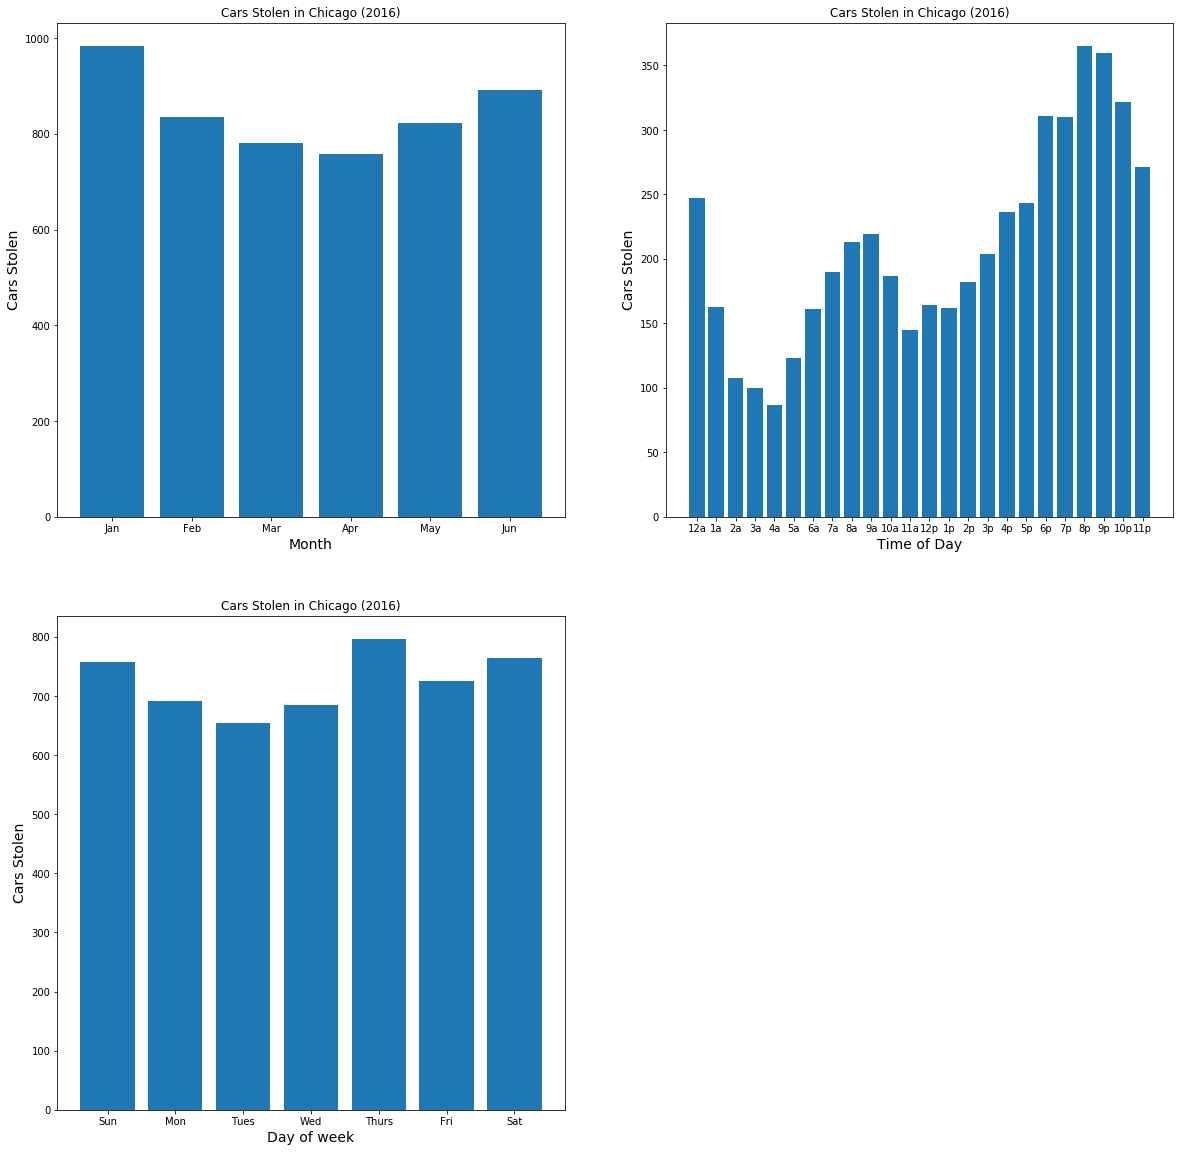

In [408]:
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.bar(month_of_theft, theft['Month'].value_counts().sort_index())
plt.xlabel('Month', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.title('Cars Stolen in Chicago (2016)')

plt.subplot(2,2,2)
plt.bar(time_of_crime, theft['Hour'].value_counts().sort_index())
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.title('Cars Stolen in Chicago (2016)')

plt.subplot(2, 2, 3)
plt.bar(weekday_of_crime, theft['Day of week'].value_counts().sort_index())
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.title('Cars Stolen in Chicago (2016)')

plt.show()

Great, we know when people have been stealing cars, what day of week, and which months of the year. But not all robberies were created equal. Let's compare the robberies that got someone arrested with the ones that did not.

In [365]:
theft_caught = theft[theft['Arrest'] == True]
theft_not_caught = theft[theft['Arrest'] == False]

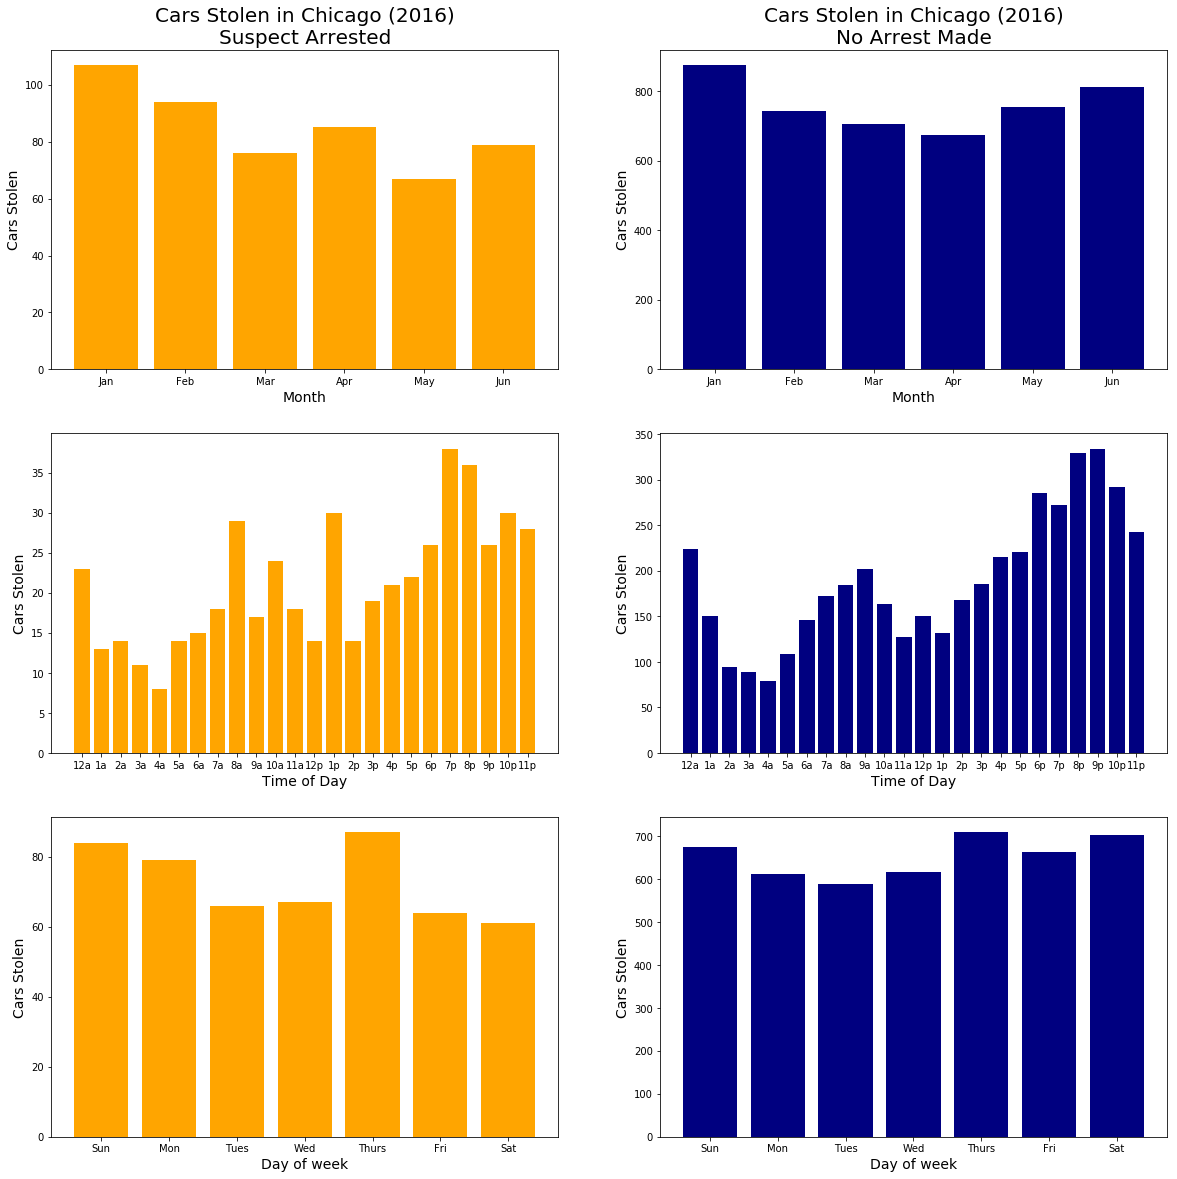

In [407]:
plt.figure(figsize=(20,20))
#top left
plt.subplot(3, 2, 1)
plt.bar(month_of_theft, theft_caught['Month'].value_counts().sort_index(), color='orange')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.title('Cars Stolen in Chicago (2016)\nSuspect Arrested', fontsize=20)

#middle left
plt.subplot(3,2,3)
plt.bar(time_of_crime, theft_caught['Hour'].value_counts().sort_index(), color='orange')
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)

#bottom left
plt.subplot(3, 2, 5)
plt.bar(weekday_of_crime, theft_caught['Day of week'].value_counts().sort_index(), color='orange')
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)


#top right
plt.subplot(3, 2, 2)
plt.bar(month_of_theft, theft_not_caught['Month'].value_counts().sort_index(), color='navy')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.title('Cars Stolen in Chicago (2016)\nNo Arrest Made', fontsize=20)

#middle right
plt.subplot(3, 2, 4)
plt.bar(time_of_crime, theft_not_caught['Hour'].value_counts().sort_index(), color='navy')
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)

#bottom right
plt.subplot(3, 2, 6)
plt.bar(weekday_of_crime, theft_not_caught['Day of week'].value_counts().sort_index(), color='navy')
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)

plt.show()

At a glance this seems to say we should avoid stealing on Thursday... Maybe just take this day off. But how about we check the percentage of successful thefts by all of the above factors.

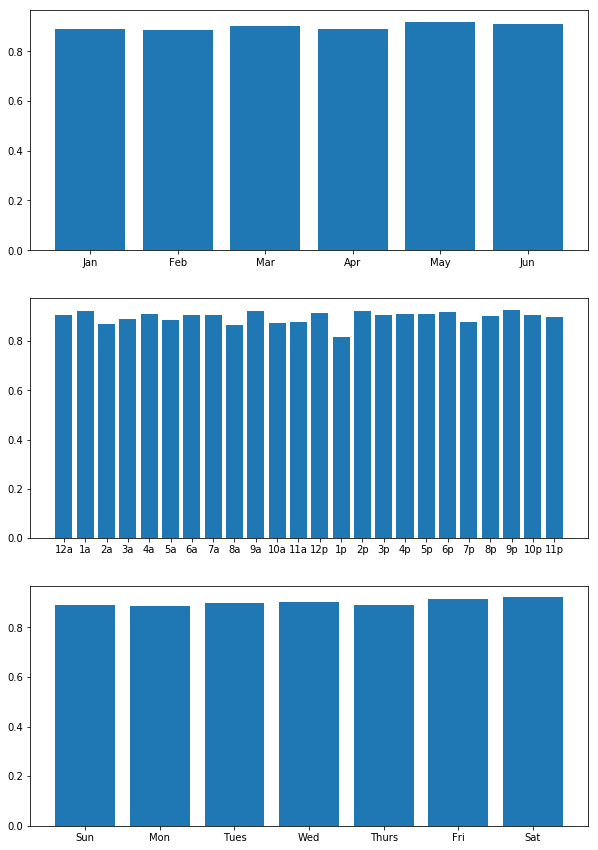

In [424]:
plt.figure(figsize=(10,15))

plt.title("Success Rate of Auto Theft\nChicago 2016")
plt.subplot(3, 1, 1)
plt.bar(month_of_theft , theft_not_caught['Month'].value_counts().sort_index()/theft['Month'].value_counts().sort_index())


plt.subplot(3, 1, 2)
plt.bar(time_of_crime, theft_not_caught['Hour'].value_counts().sort_index()/theft['Hour'].value_counts().sort_index())


plt.subplot(3, 1, 3)
plt.bar(weekday_of_crime, theft_not_caught['Day of week'].value_counts().sort_index()/theft['Day of week'].value_counts().sort_index())

plt.show()

Day and Month seems to have almost no impact on the success. It's interesting to note that weekends, when presumably fewer people are working, does not lead to a decrease in theft.

The most notable time of day is 1pm where there is almost a 10% lower success rate than other times. noon and 2pm are just as successful as any other time, so it might just be a fluke in the data.


## Where is the best place to steal cars?

The data on time, month, and day told us that this stealing business is good all year, all week, and all day. That is helpful in eliminating excuses. No longer can we say, "It's the weekend, we should wait for Monday to go get a car." My dad used to tell me, "If you wait for the conditions to be perfect, you will never get anything done." So it is with car stealing.

But we still want to increase our odds of getting away with cars and not going behind bars. Let's turn our attention towards the location in the city and see if we can follow in others' footsteps to get some cars.

It is important to note that this data is taken from the police website and they are, of course, analyzing it as well. It is important to use the most up-to-date data as they will likely make adjustments if we steal from one area too frequently.

As before, I will visualize all the thefts, then separate by successful and unsuccessful ones.

In [368]:
#converting Latitude and Longitude columns into lists
lat = list(theft['Latitude'])
lon = list(theft['Longitude'])

In [369]:
#Generating a Folium Map in Chicago
m = folium.Map(location=[41.868035989, -87.721605044], zoom_start=10)

In [370]:
#Getting our data into the right format, removing any missing listings
heat_theft = theft
heat_theft = heat_theft[['Latitude', 'Longitude']]
heat_theft = heat_theft.dropna(axis=0, subset=['Latitude', 'Longitude'])

In [371]:
#Using iterrows by copying it off somewhere online, looks handy
heat_data = [[row['Latitude'], row['Longitude']] for index, row in heat_theft.iterrows()]

In [372]:
HeatMap(heat_data, radius=17).add_to(m)

This shows where all the cars are stolen in Chicago.

In [373]:
m

Next, let's create a HeatMap of just the thefts where there was an arrest made. This will help us know which areas to avoid when stealing a car.

In [374]:
lat_caught = list(theft_caught['Latitude'])
lon_caught = list(theft_caught['Longitude'])

In [375]:
m_caught = folium.Map(location=[41.868035989, -87.721605044], zoom_start=10)

In [376]:
#Getting our data into the right format, removing any missing listings
heat_theft_caught = theft_caught
heat_theft_caught = heat_theft_caught[['Latitude', 'Longitude']]
heat_theft_caught = heat_theft_caught.dropna(axis=0, subset=['Latitude', 'Longitude'])

In [377]:
#Using iterrows by copying it off somewhere online, looks handy
heat_data_caught = [[row['Latitude'], row['Longitude']] for index, row in heat_theft_caught.iterrows()]

In [378]:
HeatMap(heat_data_caught, radius=17).add_to(m_caught)

The following HeatMap shows where suspects have been getting caught.

In [379]:
m_caught

In [380]:
lat_not_caught = list(theft_not_caught['Latitude'])
lon_not_caught = list(theft_not_caught['Longitude'])

In [381]:
m_not_caught = folium.Map(location=[41.868035989, -87.721605044], zoom_start=10)

In [382]:
#Getting our data into the right format, removing any missing listings
heat_theft_not_caught = theft_not_caught
heat_theft_not_caught = heat_theft_not_caught[['Latitude', 'Longitude']]
heat_theft_not_caught = heat_theft_not_caught.dropna(axis=0, subset=['Latitude', 'Longitude'])

In [383]:
#Using iterrows by copying it off somewhere online, looks handy
heat_data_not_caught = [[row['Latitude'], row['Longitude']] for index, row in heat_theft_not_caught.iterrows()]

In [384]:
HeatMap(heat_data_not_caught, radius=17).add_to(m_not_caught)

In [385]:
m_not_caught

### Summary of Where to Steal From

I would highly recommend avoiding the dark red clumps when stealing a car. Of note are the areas around airports. O'Hare is towards the Northwest of the map and Midway is in the Southwest. No one seems to get caught around Midway. Rental centers near O'Hare seem like a hotspot. Especially Alamo and Hertz. I would strongly recommend targeting Alamo because they have not made a single arrest while Hertz thieves have been caught quite a bit.

In [386]:
summed_caught_locations = theft_caught.sort_values(by=['Location Description']).groupby(['Location Description']).sum().reset_index()
summed_not_caught_locations = theft_not_caught.sort_values(by=['Location Description']).groupby(['Location Description']).sum().reset_index()

In [387]:
#Places where everyone was caught and where no one was caught
unique_caught_locations = []
for locale in list(summed_caught_locations['Location Description']):
    if locale not in list(summed_not_caught_locations['Location Description']):
        unique_caught_locations.append(locale)
        
unique_not_caught_locations = []
for locale in list(summed_not_caught_locations['Location Description']):
    if locale not in list(summed_caught_locations['Location Description']):
        unique_not_caught_locations.append(locale)

In [351]:
#Generating a list of places that had 100% success rate as far as no arrest
most_successful_locations = []
for loc in unique_not_caught_locations:
    most_successful_locations.append((loc, theft['Location Description'].value_counts()[loc]))
most_successful_locations

[('AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 1),
 ('AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 1),
 ('AIRPORT PARKING LOT', 3),
 ('ATM (AUTOMATIC TELLER MACHINE)', 1),
 ('BAR OR TAVERN', 1),
 ('CAR WASH', 4),
 ('CHA APARTMENT', 1),
 ('CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 1),
 ('COLLEGE/UNIVERSITY GROUNDS', 1),
 ('CONSTRUCTION SITE', 2),
 ('CONVENIENCE STORE', 1),
 ('CTA STATION', 2),
 ('DRUG STORE', 1),
 ('GOVERNMENT BUILDING/PROPERTY', 1),
 ('GROCERY FOOD STORE', 1),
 ('HOTEL/MOTEL', 4),
 ('NURSING HOME/RETIREMENT HOME', 1),
 ('OTHER COMMERCIAL TRANSPORTATION', 4),
 ('OTHER RAILROAD PROP / TRAIN DEPOT', 1),
 ('PARK PROPERTY', 9),
 ('POLICE FACILITY/VEH PARKING LOT', 2),
 ('SCHOOL, PRIVATE, GROUNDS', 1),
 ('SCHOOL, PUBLIC, GROUNDS', 4),
 ('SMALL RETAIL STORE', 7),
 ('VEHICLE-COMMERCIAL', 4),
 ('WAREHOUSE', 1)]

Above is a list of locations with a 100% success rate. Park Property looks very good. They went 9 for 9.